# KNN Algorithm

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [141]:
# Extract two useful column 
x = data.iloc[:,2:4].values  # (.values is only for converting in array)
x.shape

(400, 2)

In [142]:
# Extract output column
y = data.iloc[:,-1].values
y.shape

(400,)

In [143]:
# Divide our data for two part for cross validataion.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [144]:
x_train.shape

(320, 2)

In [145]:
x_test.shape

(80, 2)

Because of square of difference b/w our selected column is very large thats why we use Standardscaler.

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [147]:
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.12889981,  2.193092  ],
       [-0.22372266, -0.33186472],
       [-0.60301405,  0.02459976],
       [-0.22372266, -0.45068621],
       [-1.45641969, -0.21304322],
       [ 0.72450583, -0.74773994],
       [-0.22372266, -0.51009695],
       [-1.64606538, -0.62891845],
       [ 0.15556874, -0.83685606],
       [-0.98230545,  0.52959111],
       [ 0.81932867,  0.35135887],
       [ 1.29344292,  2.25250275],
       [ 0.25039158, -0.15363248],
       [-1.26677399, -1.40125815],
       [-1.07712829, -1.63890113],
       [ 0.34521443, -0.30215934],
       [ 0.53486013,  1.74751141],
       [ 0.15556874,  0.26224275],
       [-1.26677399, -0.45068621],
       [ 1.10379722,  2.10397588],
       [-0.22372266, -1.40125815],
       [-0.5081912 ,  1.48016305],
       [ 1.19862007, -1.49037427],
       [ 0.34521443, -0.53980233],
       [-1.45641969, -0.45068621],
       [-1.45641969, -1.28243666],
       [ 0.25039158,  0.14342125],
       [ 0.25039158, -0.27245397],
       [-1.07712829,

In [148]:
x_test = scaler.transform(x_test)
x_test

array([[-0.41336835, -1.25273128],
       [ 0.15556874, -0.83685606],
       [-0.22372266, -1.43096352],
       [ 0.06074589,  0.02459976],
       [ 1.38826577,  2.37132424],
       [ 0.06074589,  0.29194812],
       [-0.22372266,  0.02459976],
       [ 0.72450583, -1.43096352],
       [-1.17195114,  0.58900185],
       [ 0.25039158,  2.13368126],
       [-1.83571108, -0.77744531],
       [-0.22372266, -0.30215934],
       [ 1.10379722,  0.11371588],
       [ 0.91415152, -1.49037427],
       [-1.36159684, -0.1239271 ],
       [ 1.10379722, -1.0150883 ],
       [ 1.00897437, -1.19332054],
       [ 1.00897437, -1.22302591],
       [ 0.91415152, -0.80715069],
       [-0.22372266, -1.3418474 ],
       [-0.5081912 ,  0.88605558],
       [ 0.81932867,  0.52959111],
       [ 1.95720286, -1.40125815],
       [-0.79265975, -1.25273128],
       [ 1.10379722,  0.52959111],
       [-1.36159684, -0.21304322],
       [-0.12889981,  1.65839529],
       [ 1.86238001,  0.11371588],
       [ 0.44003728,

# applying Knn
### 1st Method

In [149]:
np.sqrt(x_train.shape[0])

17.88854381999832

In [150]:
k=17

In [151]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)

In [152]:
# Train our model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [153]:
y_pred = knn.predict(x_test)


In [154]:
y_pred.shape

(80,)

In [155]:
y_test.shape

(80,)

In [156]:
# checking accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8625

In [157]:
# calculating confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[38,  7],
       [ 4, 31]], dtype=int64)

### 2nd method

In [158]:
accuracy = []
for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(x_test)))

In [159]:
len(accuracy)

25

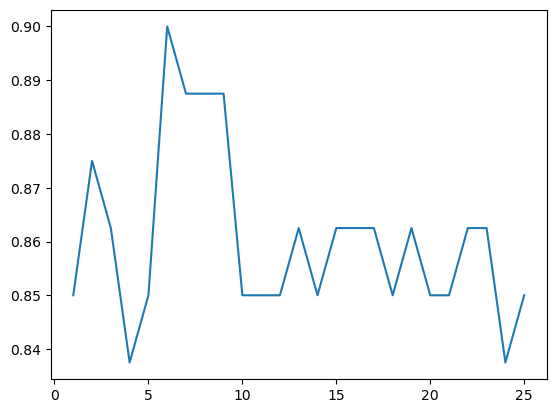

In [160]:
plt.plot(range(1,26),accuracy)

In [87]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [88]:
y_pred = knn.predict(x_test)

In [89]:
accuracy_score(y_test,y_pred)

0.9

### Creating a fun which can show as a output if we will provide a new input

In [132]:
def predict_output():
    age = int(input("Enter the age - "))
    salary = int(input("Enter the salary - "))
    
    x_new = np.array([[age],[salary]]).reshape(1,2)
    x_new = scaler.transform(x_new)
    
    if knn.predict(x_new)[0]==0:
        return "will not purchase"
    else:
        return "will purchase"
    

In [133]:
predict_output()

Enter the age - 40
Enter the salary - 120000


'will purchase'

# 1. Decision Boundary for Knn

#### 1. What is Decision Boundary 


In a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into two sets, one for each class. The classifier will classify all the points on one side of the decision boundary as belonging to one class and all those on the other side as belonging to the other class.

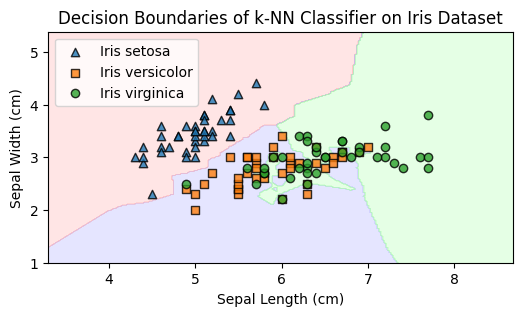

### Important Points

1. We can draw decision boundary for all the classification algorithms including Neural networks

2. Decision boundry can be both linear(as in the case of SVM) or non-linera(as in the cost of Decision tree classifier or Knn)

3. Decision boundaries are not always clear cut. That is the transition from one class in the feature space to another is not discontinous, but gradual. This effect is common in fuzzy logic based classification algorithms, where membership in one class or another is ambiguous.

4. For higher dimension problem the decision boundry acts as a hyperplane(for liner ones)

### Vornoi Diagram

In mathematics, a Vornoi diagram is a partitioning of a plane into regions based on distance to points in a specific subset of the plan.

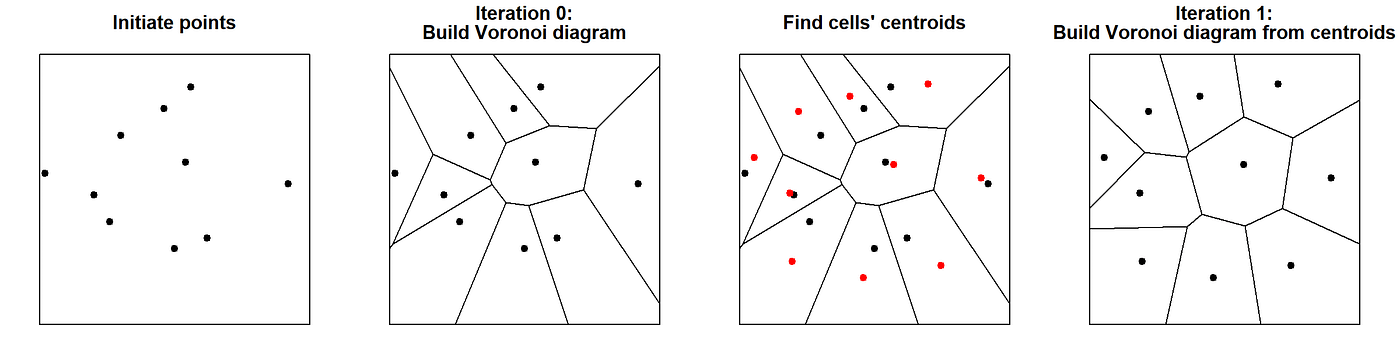

### Steps to plot Decision Boundary for Knn (Assumning 2 input cols)

1. Train the classifier on the training set.

2. Create a uniform grid(with the help of Numpy Meshgrids) of points that densely cover the region of input space containing the training set.

3. Classify each point on the grid. Store the results in an array A, where Aij contains the predicted class for the point at row i, column j on the grid.

4. Plot the  array as an image. Where each pixel corresponds to a grid points and its color represents the predicted class. The decision boundary can be seen as contours where the image changes color.

5. Finally print out the training data with their respective color on the same contour

### Step:2 Creating a Meshgrid
    

In [111]:
a=np.arange(start=x_train[:,0].min()-1, stop=x_train[:,0].max()+1, step=0.01)
b=np.arange(start=x_train[:,1].min()-1, stop=x_train[:,1].max()+1, step=0.01)

xx,yy=np.meshgrid(a,b)

In [112]:
yy.shape

(598, 598)

### Step:3 Clssifiying every point on the meshgrid

In [119]:
input_array=np.array([xx.ravel(),yy.ravel()]).T # ravel, is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array. 

labels=knn.predict(input_array)

In [120]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### Step:4 Plotting the array as an image

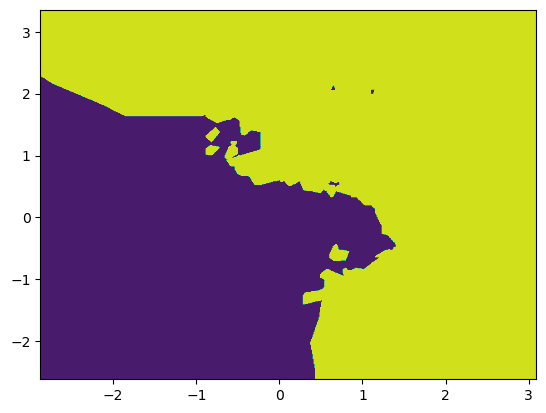

In [121]:
plt.contourf(xx,yy,labels.reshape(xx.shape))

### Step 5: Plotting all the training data on the plot 

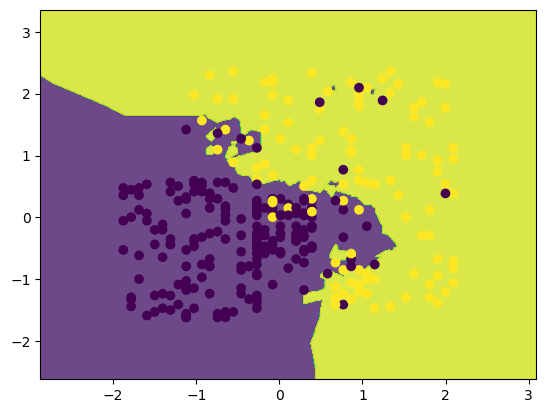

In [131]:
plt.contourf(xx,yy,labels.reshape(xx.shape), alpha=0.8)
plt.scatter(x_train[:,0],x_train[:,1], c=y_train)

In [134]:
# effect of K on Training Error rate and Validation Error rate 

error_train=[]
error_test=[]

for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    x=confusion_matrix(y_train,knn.predict(x_train))
    y=confusion_matrix(y_test,knn.predict(x_test))
    error_train.append((x[0][1]+x[1][0])/x.sum())
    error_test.append((y[0][1]+x[1][0])/y.sum())

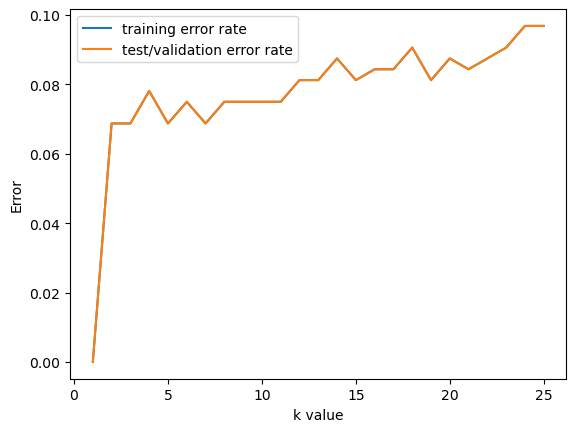

In [135]:
plt.plot(range(1,26),error_train,label='training error rate')
plt.plot(range(1,26),error_train,label='test/validation error rate')
plt.xlabel('k value')
plt.ylabel('Error')
plt.legend()